In [4]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# EU

In [11]:
df = pd.read_csv(r"Cfile.csv")
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10


In [13]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,Country of Exchange,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2016,2.93,5.1,20.1,66.40,70.25,68.00,56.88,66.40,1.387610e+10,Large Cap
1,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2017,4.17,7.7,20.4,68.66,68.28,74.58,59.31,68.66,2.089835e+10,Large Cap
2,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2018,12.25,18.6,42.2,73.62,72.78,74.72,73.21,73.62,9.062689e+09,Mid Cap
3,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2019,10.74,16.3,34.2,74.58,69.59,71.77,88.15,74.58,8.503184e+09,Mid Cap
4,Covestro AG,1COV,Germany,Plastics Material and Resin Manufacturing,2020,3.26,4.9,10.5,76.25,74.38,69.86,90.37,76.25,1.191101e+10,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2019,24.28,0.9,13.1,89.93,90.84,91.69,86.64,79.96,6.138598e+10,Large Cap
6292,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2020,27.69,1.0,12.7,88.87,89.60,90.93,85.50,50.53,6.349212e+10,Large Cap
6293,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2021,25.56,0.9,10.5,89.19,86.31,87.95,97.03,76.17,6.604281e+10,Large Cap
6294,Zurich Insurance Group AG,ZURN,Switzerland,Direct Property and Casualty Insurance Carriers,2022,34.66,1.2,13.7,87.89,85.62,87.16,94.72,78.62,7.199106e+10,Large Cap


In [15]:
import os
import pickle
import numpy as np
import pandas as pd
from pygam import LinearGAM, s, f, te

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Country of Exchange'] = df['Country of Exchange'].astype('category')

df['Country_code'] = df['Country of Exchange'].cat.codes
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Directory to save models
model_dir = 'saved_gam_models_gridsearch'
os.makedirs(model_dir, exist_ok=True)

# Small epsilon to avoid logit(0) or logit(1)
eps = 1e-3

# Loop over ESG targets
for target in esg_targets:
    print(f"\n🔁 Fitting GAM for {target}...")

    # Drop missing data
    df_clean = df.dropna(subset=predictors + [target, 'Country_code', 'Industry_code', 'MCap_code']).copy()

    # Feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Transform target to logit scale
    y_raw = df_clean[target].values
    y_scaled = np.clip(y_raw / 100, eps, 1 - eps)
    y_logit = np.log(y_scaled / (1 - y_scaled))

    # Define model structure
    gam = LinearGAM(
        s(0) + s(1) + s(2) +              # Numeric splines
        f(3) + f(4) + f(5) +              # Categorical factors
        te(3, 4) + te(3, 5) + te(4, 5) +  # Cat x Cat interactions
        te(0, 1) + te(0, 2) + te(1, 2) +  # Num x Num interactions
        te(0, 3) + te(0, 4) + te(0, 5) +  # Num x Cat interactions
        te(1, 3) + te(1, 4) + te(1, 5) +
        te(2, 3) + te(2, 4) + te(2, 5)
    )

    # Gridsearch for optimal lambda
    gam.gridsearch(X, y_logit)

    # Predict and inverse-transform to original scale
    y_pred_logit = gam.predict(X)
    y_pred_scaled = 1 / (1 + np.exp(-y_pred_logit))
    y_pred = y_pred_scaled * 100

    # Print results
    min_pred = y_pred.min()
    max_pred = y_pred.max()
    print(f"✅ Prediction range for {target}: {min_pred:.2f} to {max_pred:.2f}")
    print(f"Optimal penalties (λ): {gam.lam}")

    # 🔍 Show GAM summary and R² value
    print("\n📊 GAM Summary:")
    gam.summary()
    try:
        pseudo_r2 = gam.statistics_['pseudo_r2']
        if isinstance(pseudo_r2, dict):
            pseudo_r2 = next(iter(pseudo_r2.values()))
        print(f"\n🔢 R² for {target}: {pseudo_r2:.4f}")
    except Exception as e:
        print(f"⚠️ Could not extract R² for {target}: {e}")


    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model to: {model_path}")

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


🔁 Fitting GAM for ESG_score...


100% (11 of 11) |########################| Elapsed Time: 0:01:19 Time:  0:01:190:07
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for ESG_score: 8.43 to 93.89
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7464.4905
Number of Samples:                         6296 AIC:                                            15934.1187
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:15 Time:  0:01:150:06
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Env_score: 0.04 to 97.28
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -9029.7151
Number of Samples:                         6296 AIC:                                            19064.5678
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:15 Time:  0:01:150:06
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Soc_score: 1.55 to 98.07
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7394.4819
Number of Samples:                         6296 AIC:                                            15794.1014
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:13 Time:  0:01:130:06
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Gov_score: 7.03 to 97.78
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7585.9403
Number of Samples:                         6296 AIC:                                            16177.0183
                       

100% (11 of 11) |########################| Elapsed Time: 0:01:13 Time:  0:01:130:06


✅ Prediction range for ESG_Comb_score: 7.49 to 89.96
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    501.5688
Link Function:                     IdentityLink Log Likelihood:                                 -7348.2016
Number of Samples:                         6296 AIC:                                            15701.5408
                  

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\3749470767.py:72: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


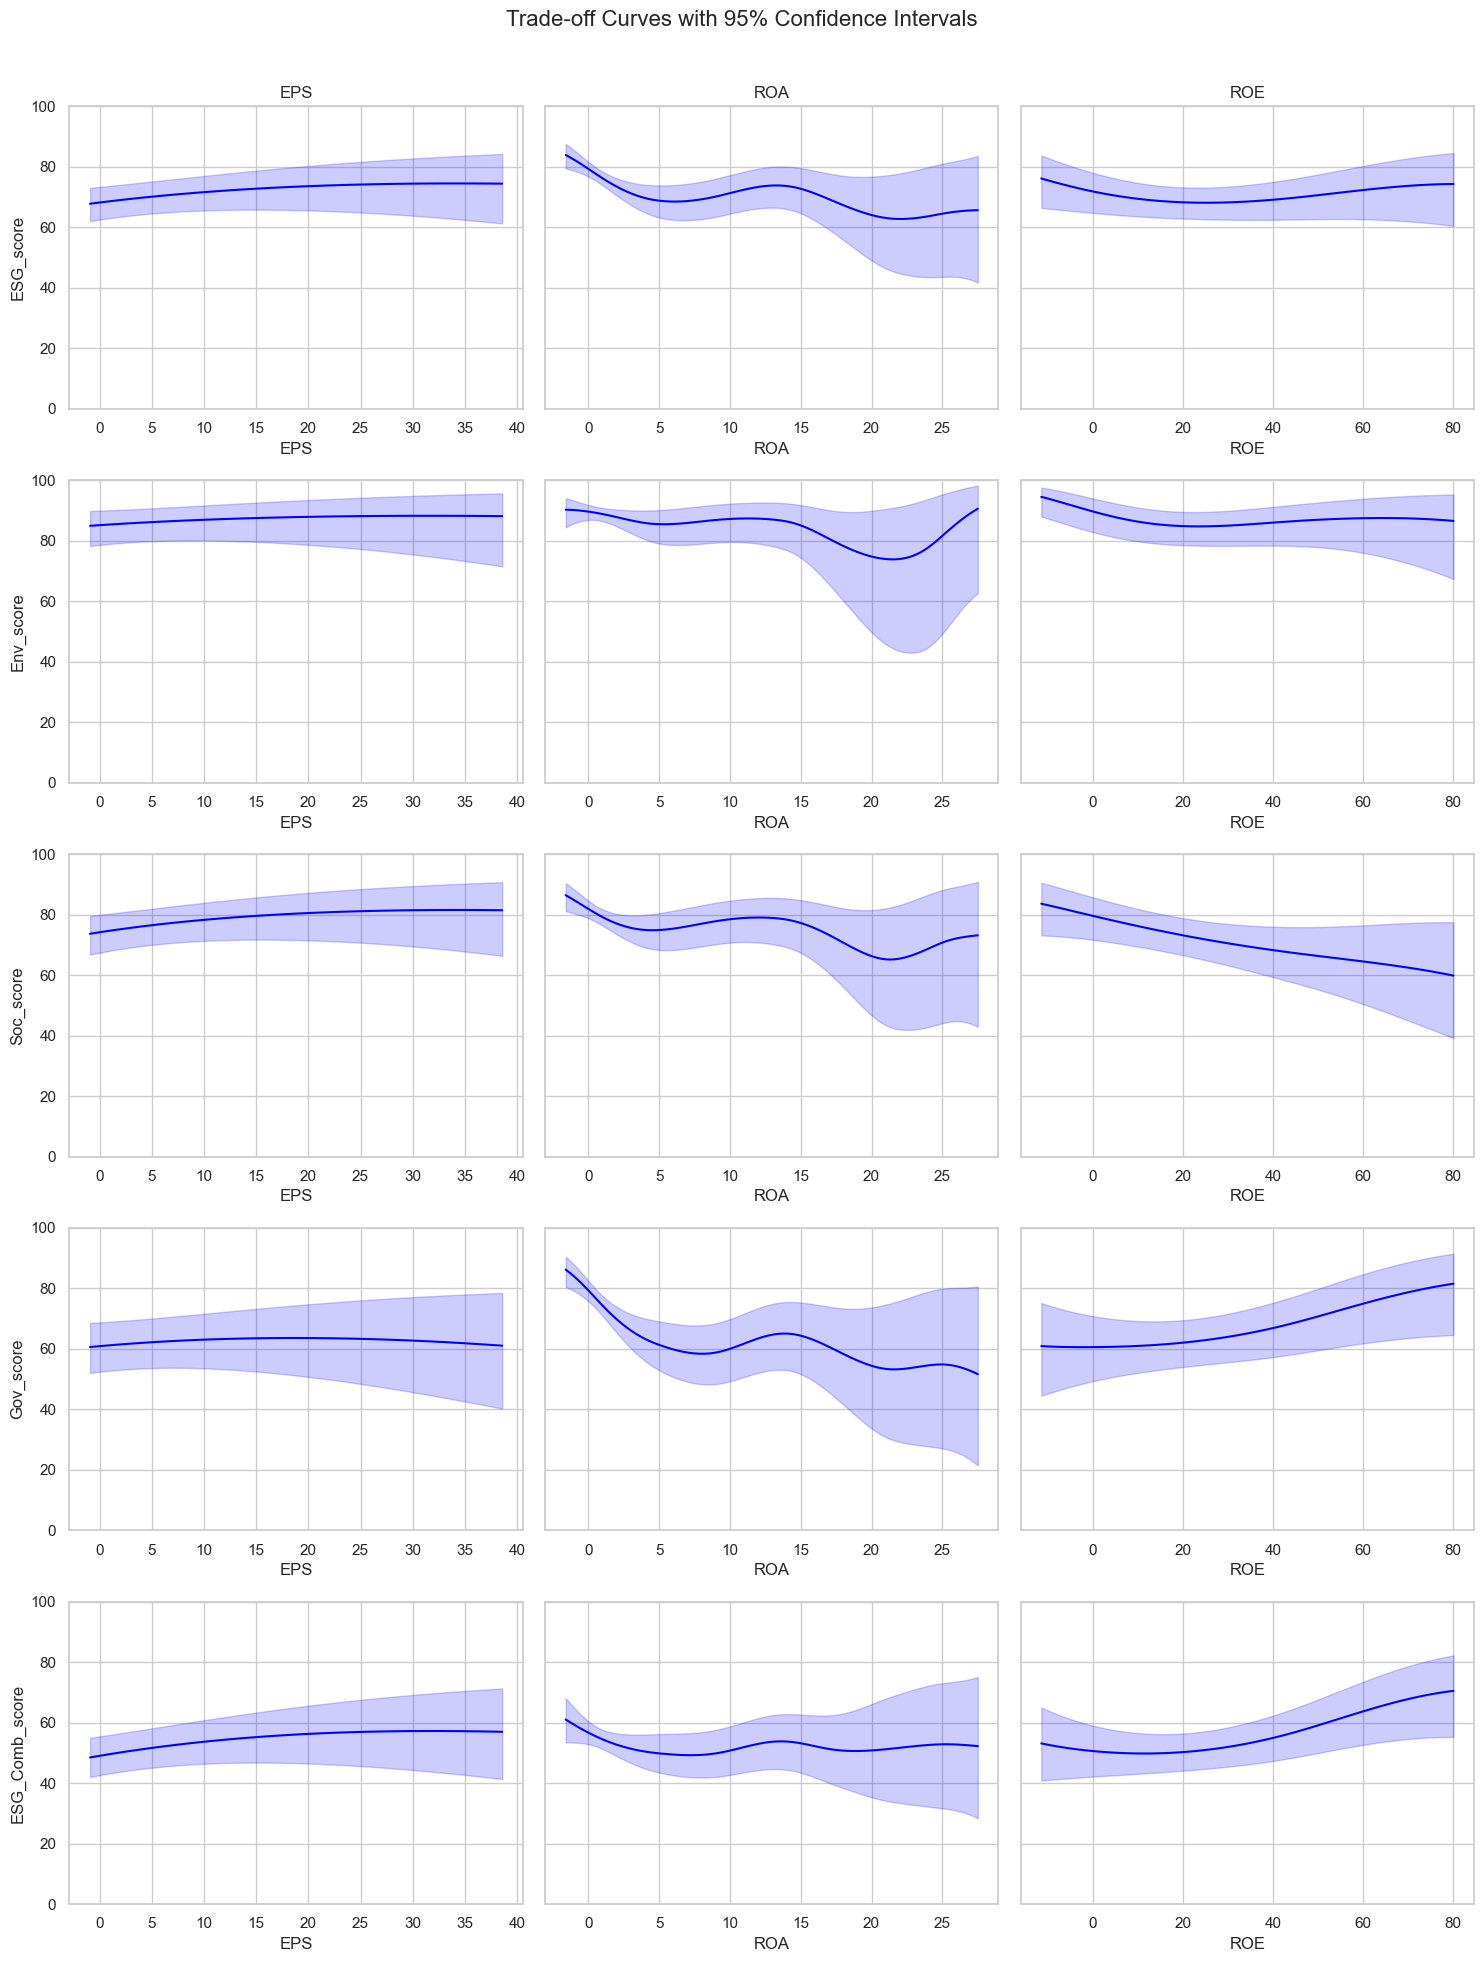

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import os

# Set seaborn style
sns.set(style="whitegrid")

# Define plot structure
n_rows = len(esg_targets)  # 5 ESG targets
n_cols = len(predictors)   # 3 financial predictors

# Drop missing values and prepare median reference values
df_clean = df.dropna(subset=predictors + esg_targets + ['Country_code', 'Industry_code', 'MCap_code']).copy()

# Median values for all predictors (used as fixed input in trade-off curve)
median_financials = df_clean[predictors].median().values
median_country = int(df_clean['Country_code'].mode()[0])
median_industry = int(df_clean['Industry_code'].mode()[0])
median_mcap = int(df_clean['MCap_code'].mode()[0])
median_categoricals = [median_country, median_industry, median_mcap]

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), sharey='row')
fig.suptitle("Trade-off Curves with 95% Confidence Intervals", fontsize=16)

# Iterate over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Loop over each financial predictor
    for col_idx, predictor in enumerate(predictors):
        ax = axes[row_idx, col_idx]

        # Define range for this predictor
        var_range = np.linspace(
            df_clean[predictor].quantile(0.01),
            df_clean[predictor].quantile(0.99),
            100
        )

        # Construct X matrix for predictions
        # Start with median values for all predictors
        X_plot = np.tile(np.hstack([median_financials, median_categoricals]), (100, 1))

        # Vary only the column for this predictor
        X_plot[:, col_idx] = var_range

        # Predict in logit space
        y_logit_pred = gam.predict(X_plot)
        y_logit_conf = gam.confidence_intervals(X_plot, width=0.95)

        # Convert predictions from logit back to percentage scale
        y_pred = 1 / (1 + np.exp(-y_logit_pred)) * 100
        y_lower = 1 / (1 + np.exp(-y_logit_conf[:, 0])) * 100
        y_upper = 1 / (1 + np.exp(-y_logit_conf[:, 1])) * 100

        # Plot prediction curve with confidence intervals
        ax.plot(var_range, y_pred, color='blue', label='Prediction')
        ax.fill_between(var_range, y_lower, y_upper, color='blue', alpha=0.2, label='95% CI')

        # Labeling
        if row_idx == 0:
            ax.set_title(predictor, fontsize=12)
        if col_idx == 0:
            ax.set_ylabel(target, fontsize=12)

        ax.set_xlabel(predictor)
        ax.set_ylim(0, 100)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.97])
#plt.savefig('esg_tradeoff_curves_final.jpg', format='jpg', bbox_inches='tight', dpi=300)

plt.show()


In [21]:
import numpy as np
import pickle
import os
import pandas as pd

# Define inputs
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
model_dir = 'saved_gam_models_gridsearch'

# Prepare clean dataset
df_clean = df.dropna(subset=predictors + esg_targets + ['Country_code', 'Industry_code', 'MCap_code']).copy()

# Combine features
X_num = df_clean[predictors].values
X_cat = df_clean[['Country_code', 'Industry_code', 'MCap_code']].values
X_all = np.hstack([X_num, X_cat])

# Baseline = median of each feature
X_baseline = np.median(X_all, axis=0)

# Map feature names to column indices
feature_indices = {name: i for i, name in enumerate(predictors + ['Country_code', 'Industry_code', 'MCap_code'])}

# Logistic function for inverse logit transform
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Store results
results = []

for target in esg_targets:
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as f:
        gam = pickle.load(f)

    for predictor in predictors:
        idx = feature_indices[predictor]
        base_val = X_baseline[idx]
        delta = base_val * 0.01  # 1% relative change

        if base_val == 0:
            marginal_effect = np.nan
            esg_change = np.nan
        else:
            # Create up/down variations
            X_up = X_baseline.copy()
            X_down = X_baseline.copy()
            X_up[idx] += delta
            X_down[idx] -= delta

            # Predict in logit space
            y_logit_up = gam.predict([X_up])[0]
            y_logit_down = gam.predict([X_down])[0]

            # Convert to original 0–100 scale
            y_up = logistic(y_logit_up) * 100
            y_down = logistic(y_logit_down) * 100

            # Central difference derivative approximation
            marginal_effect = (y_up - y_down) / (2 * delta)
            esg_change = marginal_effect * delta

        # Append result
        results.append({
            'ESG Target': target,
            'Financial Ratio': predictor,
            'Base Value': base_val,
            'Marginal Effect (ΔESG/ΔRatio)': marginal_effect,
            'Predicted ESG Change (+1% Ratio)': esg_change
        })

# Output DataFrame
df_tradeoffs = pd.DataFrame(results)
print(df_tradeoffs.round(4))


        ESG Target Financial Ratio  Base Value  Marginal Effect (ΔESG/ΔRatio)  \
0        ESG_score             EPS        1.45                         0.1922   
1        ESG_score             ROA        5.00                         0.6813   
2        ESG_score             ROE       14.10                        -0.2502   
3        Env_score             EPS        1.45                         0.1069   
4        Env_score             ROA        5.00                         0.5937   
5        Env_score             ROE       14.10                        -0.2018   
6        Soc_score             EPS        1.45                         0.0053   
7        Soc_score             ROA        5.00                         0.0560   
8        Soc_score             ROE       14.10                        -0.0246   
9        Gov_score             EPS        1.45                         1.0114   
10       Gov_score             ROA        5.00                         1.6662   
11       Gov_score          

# USA

In [23]:
df = pd.read_csv(r"Cfile.csv")
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10


In [25]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10,Large Cap
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09,Mid Cap
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09,Mid Cap
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09,Mid Cap
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09,Mid Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10,Large Cap
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10,Large Cap
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11,Large Cap
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10,Large Cap


In [27]:
import os
import pickle
import numpy as np
import pandas as pd
from pygam import LinearGAM, s, f, te

# Define predictors and ESG targets
predictors = ['EPS', 'ROA', 'ROE']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# Prepare DataFrame: categorical codes
df = df.copy()
df['NAICS National Industry Name'] = df['NAICS National Industry Name'].astype('category')
df['Market Capitalization Category'] = df['Market Capitalization Category'].astype('category')
df['Industry_code'] = df['NAICS National Industry Name'].cat.codes
df['MCap_code'] = df['Market Capitalization Category'].cat.codes

# Directory to save models
model_dir = 'saved_gam_models_gridsearch'
os.makedirs(model_dir, exist_ok=True)

# Small epsilon to avoid logit(0) or logit(1)
eps = 1e-3

# Loop over ESG targets
for target in esg_targets:
    print(f"\n🔁 Fitting GAM for {target}...")

    # Drop missing data
    df_clean = df.dropna(subset=predictors + [target, 'Industry_code', 'MCap_code']).copy()

    # Feature matrix
    X_num = df_clean[predictors].values
    X_cat = df_clean[['Industry_code', 'MCap_code']].values
    X = np.hstack([X_num, X_cat])

    # Transform target to logit scale
    y_raw = df_clean[target].values
    y_scaled = np.clip(y_raw / 100, eps, 1 - eps)
    y_logit = np.log(y_scaled / (1 - y_scaled))

    # Define model structure
    gam = LinearGAM(
        s(0) + s(1) + s(2) +
        f(3) + f(4) +
        te(3, 4) +
        te(0, 1) + te(0, 2) + te(1, 2) +
        te(0, 3) + te(0, 4) +
        te(1, 3) + te(1, 4) +
        te(2, 3) + te(2, 4)
    )

    # Gridsearch for optimal lambda
    gam.gridsearch(X, y_logit)

    # Predict and inverse-transform to original scale
    y_pred_logit = gam.predict(X)
    y_pred_scaled = 1 / (1 + np.exp(-y_pred_logit))
    y_pred = y_pred_scaled * 100

    # Print results
    min_pred = y_pred.min()
    max_pred = y_pred.max()
    print(f"✅ Prediction range for {target}: {min_pred:.2f} to {max_pred:.2f}")
    print(f"Optimal penalties (λ): {gam.lam}")

    # 🔍 Show GAM summary and R² value
    print("\n📊 GAM Summary:")
    gam.summary()
    try:
        pseudo_r2 = gam.statistics_['pseudo_r2']
        if isinstance(pseudo_r2, dict):
            pseudo_r2 = next(iter(pseudo_r2.values()))
        print(f"\n🔢 R² for {target}: {pseudo_r2:.4f}")
    except Exception as e:
        print(f"⚠️ Could not extract R² for {target}: {e}")


    # Save model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'wb') as file_handle:
        pickle.dump(gam, file_handle)

    print(f"✅ Saved model to: {model_path}")

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


🔁 Fitting GAM for ESG_score...


100% (11 of 11) |########################| Elapsed Time: 0:00:33 Time:  0:00:330:03
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for ESG_score: 7.44 to 91.86
Optimal penalties (λ): [[0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [0.015848931924611134], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]], [[0.015848931924611134], [0.015848931924611134]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                

100% (11 of 11) |########################| Elapsed Time: 0:00:30 Time:  0:00:300:02
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Env_score: 0.01 to 98.22
Optimal penalties (λ): [[0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    262.5681
Link Function:       

100% (11 of 11) |########################| Elapsed Time: 0:00:30 Time:  0:00:300:02
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Soc_score: 4.70 to 97.51
Optimal penalties (λ): [[0.001], [0.001], [0.001], [0.001], [0.001], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]], [[0.001], [0.001]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    341.0776
Link Function:                     IdentityLink Log Likelihood:                                 -5312.7088
Number of Samples:                         4585 AIC:                                            11309.5728
                                                AICc:                                           11364.9058
                         

100% (11 of 11) |########################| Elapsed Time: 0:00:30 Time:  0:00:300:02
C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

✅ Prediction range for Gov_score: 6.22 to 97.07
Optimal penalties (λ): [[0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [0.25118864315095796], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]], [[0.25118864315095796], [0.25118864315095796]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    235.6

100% (11 of 11) |########################| Elapsed Time: 0:00:32 Time:  0:00:320:02


✅ Prediction range for ESG_Comb_score: 9.97 to 89.70
Optimal penalties (λ): [[0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [0.0630957344480193], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]], [[0.0630957344480193], [0.0630957344480193]]]

📊 GAM Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    262.5681
Link Function:  

C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_17932\397589946.py:69: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


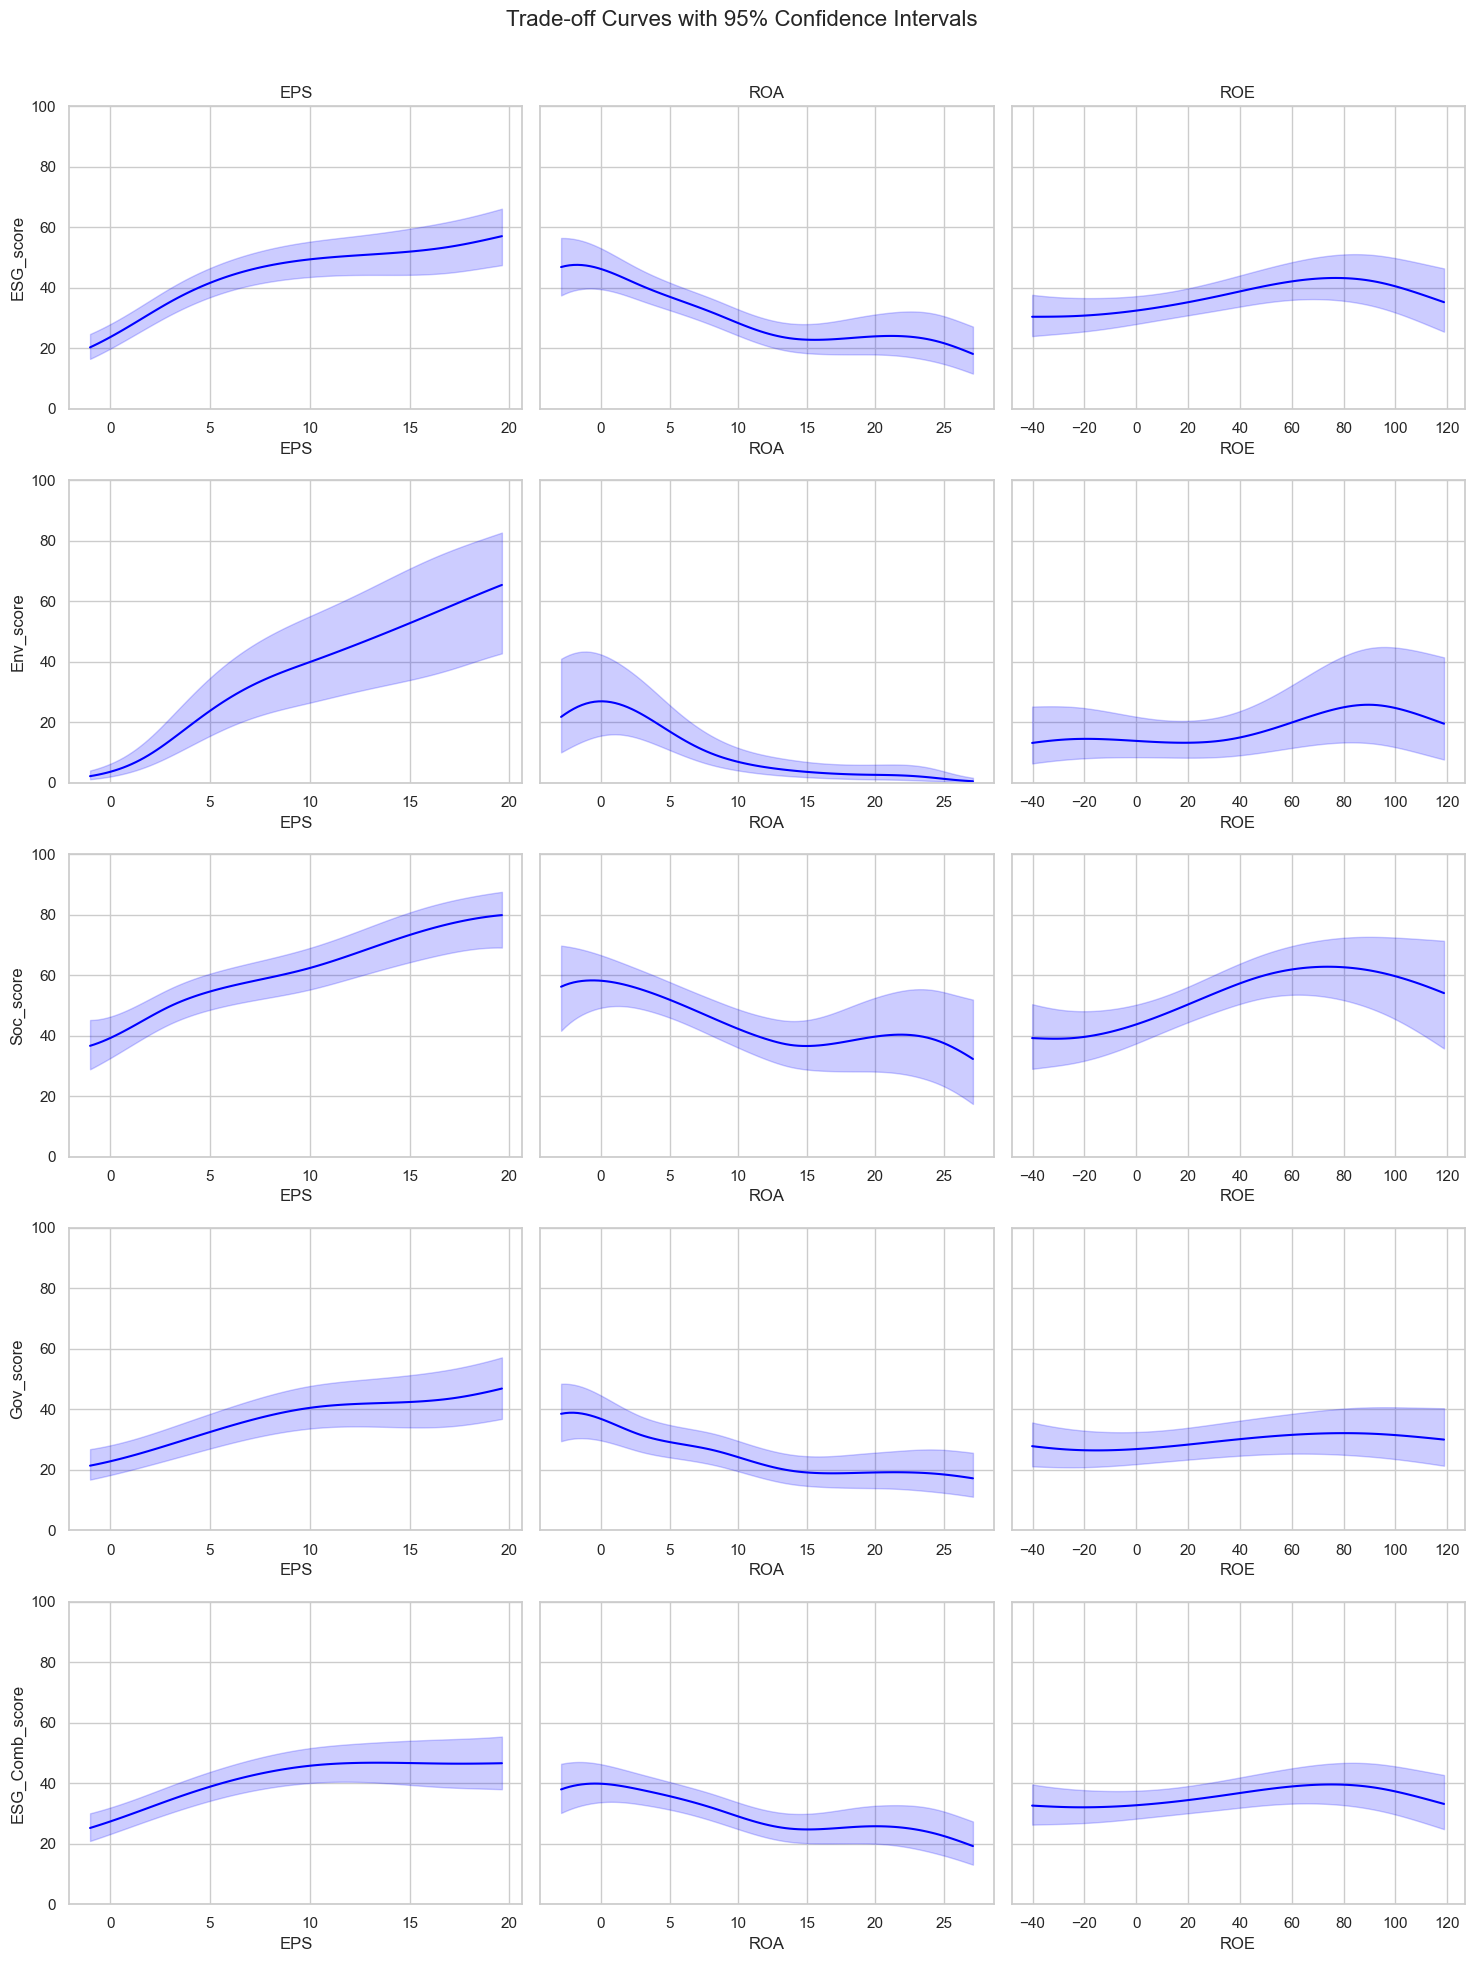

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style
sns.set(style="whitegrid")

# Define plot structure
n_rows = len(esg_targets)  # 5 ESG targets
n_cols = len(predictors)   # 3 financial predictors

# Prepare data
df_clean = df.dropna(subset=predictors + esg_targets + ['Industry_code', 'MCap_code']).copy()
median_values = df_clean[predictors + ['Industry_code', 'MCap_code']].median().values

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), sharey='row')
fig.suptitle("Trade-off Curves with 95% Confidence Intervals", fontsize=16)

# Iterate over ESG targets
for row_idx, target in enumerate(esg_targets):
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as file_handle:
        gam = pickle.load(file_handle)

    # Loop over predictors
    for col_idx, predictor in enumerate(predictors):
        ax = axes[row_idx, col_idx]

        # Define variable range
        var_range = np.linspace(
            df_clean[predictor].quantile(0.01),
            df_clean[predictor].quantile(0.99),
            100
        )
        X_plot = np.tile(median_values, (100, 1))
        X_plot[:, col_idx] = var_range

        # Predictions and confidence intervals
        y_logit_pred = gam.predict(X_plot)
        y_logit_conf = gam.confidence_intervals(X_plot, width=0.95)

        # Inverse transform from logit to original scale (0–100)
        y_pred = 1 / (1 + np.exp(-y_logit_pred)) * 100
        y_lower = 1 / (1 + np.exp(-y_logit_conf[:, 0])) * 100
        y_upper = 1 / (1 + np.exp(-y_logit_conf[:, 1])) * 100

        # Plot curve with CI
        ax.plot(var_range, y_pred, color='blue', label='Prediction')
        ax.fill_between(var_range, y_lower, y_upper, color='blue', alpha=0.2, label='95% CI')

        # Axis titles and labels
        if row_idx == 0:
            ax.set_title(f"{predictor}", fontsize=12)
        if col_idx == 0:
            ax.set_ylabel(f"{target}", fontsize=12)

        ax.set_xlabel(predictor)
        ax.set_ylim(0, 100)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('esg_tradeoff_curves_final_USA.jpg', format='jpg', bbox_inches='tight', dpi=300)
plt.show()


In [33]:
import numpy as np
import pandas as pd
import os
import pickle

# Configuration
predictors = ['EPS', 'ROA', 'ROE']
categorical = ['Industry_code', 'MCap_code']
esg_targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
model_dir = 'saved_gam_models_gridsearch'

# Prepare dataset
df_clean = df.dropna(subset=predictors + esg_targets + categorical).copy()
X_num = df_clean[predictors].values
X_cat = df_clean[categorical].values
X_all = np.hstack([X_num, X_cat])
X_baseline = np.median(X_all, axis=0)

# Feature index mapping
feature_names = predictors + categorical
feature_indices = {name: i for i, name in enumerate(feature_names)}

# Inverse logit function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Collect results
results = []

for target in esg_targets:
    # Load model
    model_path = os.path.join(model_dir, f'gam_model_{target}.pkl')
    with open(model_path, 'rb') as f:
        gam = pickle.load(f)

    for predictor in predictors:
        idx = feature_indices[predictor]
        base_val = X_baseline[idx]
        delta = base_val * 0.01  # 1% relative change

        if base_val == 0:
            marginal_effect = np.nan
            esg_change = np.nan
        else:
            # Perturb input
            X_up = X_baseline.copy()
            X_down = X_baseline.copy()
            X_up[idx] += delta
            X_down[idx] -= delta

            # Predict logit outputs
            y_logit_up = gam.predict([X_up])[0]
            y_logit_down = gam.predict([X_down])[0]

            # Convert to original scale [0, 100]
            y_up = logistic(y_logit_up) * 100
            y_down = logistic(y_logit_down) * 100

            # Estimate marginal effect
            marginal_effect = (y_up - y_down) / (2 * delta)
            esg_change = marginal_effect * delta

        results.append({
            'ESG Target': target,
            'Financial Ratio': predictor,
            'Base Value': base_val,
            'Marginal Effect (ΔESG/ΔRatio)': marginal_effect,
            'Predicted ESG Change (+1% Ratio)': esg_change
        })

# Convert to DataFrame
df_tradeoffs = pd.DataFrame(results)
print(df_tradeoffs.round(4))


        ESG Target Financial Ratio  Base Value  Marginal Effect (ΔESG/ΔRatio)  \
0        ESG_score             EPS        2.85                         3.7403   
1        ESG_score             ROA        6.40                        -1.6407   
2        ESG_score             ROE       17.00                         0.1552   
3        Env_score             EPS        2.85                         4.7968   
4        Env_score             ROA        6.40                        -2.4754   
5        Env_score             ROE       17.00                        -0.0070   
6        Soc_score             EPS        2.85                         3.2413   
7        Soc_score             ROA        6.40                        -1.9430   
8        Soc_score             ROE       17.00                         0.3534   
9        Gov_score             EPS        2.85                         2.0405   
10       Gov_score             ROA        6.40                        -0.7734   
11       Gov_score          